In [1]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [58]:
env = Environment('data_normal.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


### Скорость остывания

In [59]:
from scipy.optimize import curve_fit
dH = env.P_s - 2*env.T1.h

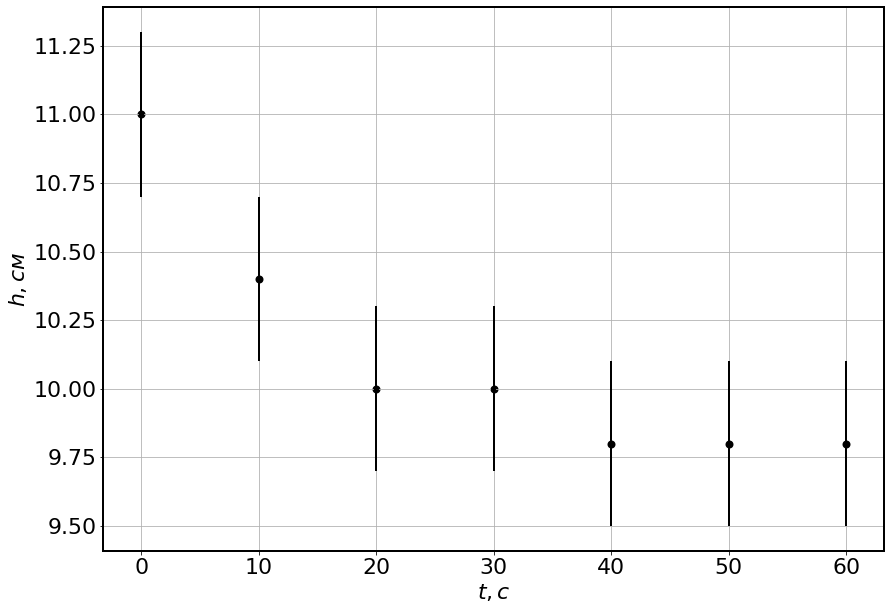

In [60]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

H_, t_ = dH.detach().numpy(), env.T1.t.detach().numpy()

ax.scatter(t_, H_, linewidth=2, c='black')

# X = np.linspace(min(t_)*0.97, max(t_)*1.03, 100)
# X = np.array([min(t_)*0.97, max(t_)*1.03])

# Y = func(X, popt[0], popt[1])
# ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2], label='1')

# Y = a_norm.item() + b_norm.item()*X
# ax.plot(X, Y, linewidth=2, c='gray', label='2')

ax.errorbar(t_, H_, xerr = env.get_error(dH), yerr = env.get_error(env.T1.t), fmt='none', linewidth=2, c='black')
# ax.legend()

ax.set_ylabel(r"$h, см$")
ax.set_xlabel(r"$t, с$")
fig.savefig(r'../images/ht.eps', format='eps')

### Обработка результатов

In [61]:
h1 = env.P_s - 2*env.T_0_5.h1
h2 = env.P_s - 2*env.T_0_5.h2
gamma1 = (torch.mean(h1))/(torch.mean(h1) - torch.mean(h2))
gamma1

tensor(2.7417, dtype=torch.float64, grad_fn=<DivBackward0>)

In [62]:
h1 = env.P_s - 2*env.T_1_5.h1
h2 = env.P_s - 2*env.T_1_5.h2
gamma2 = (torch.mean(h1))/(torch.mean(h1) - torch.mean(h2))
gamma2

tensor(1.4047, dtype=torch.float64, grad_fn=<DivBackward0>)

In [63]:
h1 = env.P_s - 2*env.T_5_0.h1
h2 = env.P_s - 2*env.T_5_0.h2
gamma3 = (torch.mean(h1))/(torch.mean(h1) - torch.mean(h2))
gamma3

tensor(1.2759, dtype=torch.float64, grad_fn=<DivBackward0>)

In [80]:
gammas = [gamma2, gamma3]
t = [env.t2, env.t3]

In [81]:
aa, bb = env.chi2(t, gammas)

Using reversed axis


D:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Графики

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


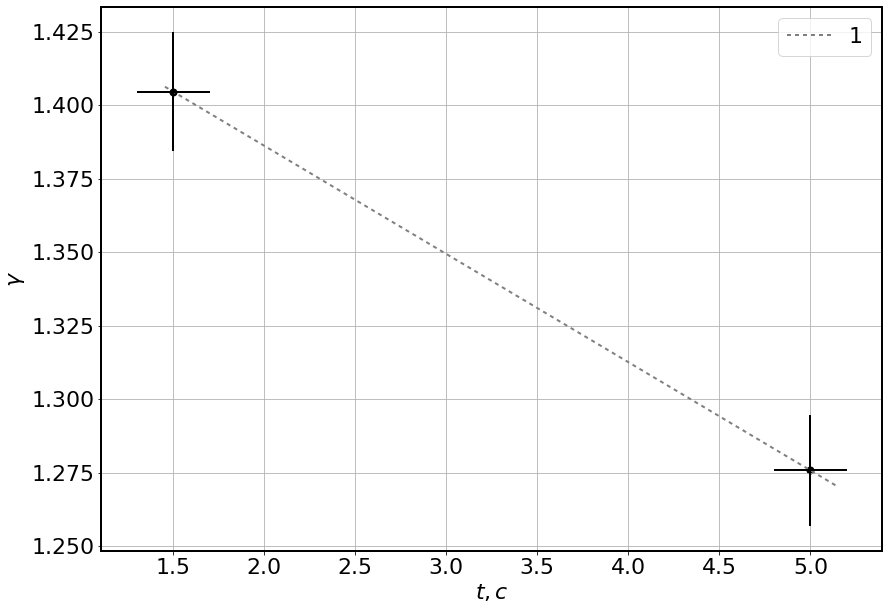

In [82]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

gammas_, t_ = [_.item() for _ in gammas], [_.item() for _ in t]

ax.scatter(t_, gammas_, linewidth=2, c='black')

X = np.array([min(t_)*0.97, max(t_)*1.03])

Y = aa.item() + bb.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2], label='1')

ax.errorbar(t_, gammas_, xerr = env.get_error(t), yerr = env.get_error(gammas), fmt='none', linewidth=2, c='black')
ax.legend()

ax.set_ylabel(r"$\gamma$")
ax.set_xlabel(r"$t, с$")
fig.savefig(r'../images/gammat.eps', format='eps')